In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train.shape)

(60000, 28, 28)


Increasing the dimension to be 3D. the last added dimension for the color. as CNN expecting a 3d image input.

In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [8]:
# getting the number of classes

print(len(set(y_train)))

10


## Build the CNN model

In [16]:
i = Input(x_train[0].shape)
# Conv2D(output Feature Map, filter dimension, stride to decrease the dimension by half, activation function)
x = Conv2D(32, (3, 3), strides = 2, activation = 'relu')(i)
x = Conv2D(64, (3, 3), strides = 2, activation = 'relu')(x)
x = Conv2D(128, (3, 3), strides = 2, activation = 'relu')(x)

x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(set(y_train)), activation = 'softmax')(x)

model = Model(i, x)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 13, 13, 32)        320       
                                                                 
 conv2d_18 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 2, 2, 128)         73856     
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               2626

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
hsitory = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 20, verbose = 1)

Epoch 1/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4891 - accuracy: 0.8185 - val_loss: 0.4306 - val_accuracy: 0.8382
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3625 - accuracy: 0.8656 - val_loss: 0.3426 - val_accuracy: 0.8729
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3116 - accuracy: 0.8834 - val_loss: 0.3197 - val_accuracy: 0.8809
Epoch 4/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2805 - accuracy: 0.8939 - val_loss: 0.2982 - val_accuracy: 0.8897
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2554 - accuracy: 0.9048 - val_loss: 0.2902 - val_accuracy: 0.8949
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2327 - accuracy: 0.9114 - val_loss: 0.2966 - val_accuracy: 0.8936
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2146 - accuracy: 0.9185 - val_loss: 0.2922 - val_accuracy:

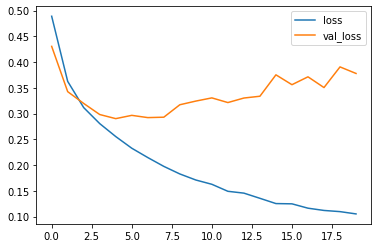

In [21]:
# loss per iteration
plt.plot(hsitory.history['loss'], label = 'loss')
plt.plot(hsitory.history['val_loss'], label = 'val_loss')
plt.legend()

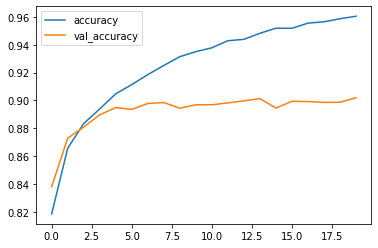

In [22]:
# accuracy per iteration
plt.plot(hsitory.history['accuracy'], label = 'accuracy')
plt.plot(hsitory.history['val_accuracy'], label = 'val_accuracy')
plt.legend()